# Clustering Abstract

In this excercise, we will use K-Means on Abstract records then we will see if each cluster corresponds mostly to a particular Directorate. This will tell us if directorate are truly distinct from each other or if there are overlaps between each other.

There are 7 Directorates in the NSF organization and a few offices. Offices were grouped together so that we will set K-Means to look for 8 clusters. The list of possible categories is then:
1. Directorate for Biological Sciences
2. Directorate for Computer & Information Science & Engineering
3. Directorate for Education & Human Resources
4. Directorate for Engineering
5. Directorate for Geosciences
6. Directorate for Mathematical & Physical Sciences
7. Directorate for Social, Behavioral & Economic Sciences



<img src="img/Directorate_categories.png" width="800">

## Directorate Classification based on Abstract


Top terms per cluster:<br><br>
Cluster 0: climate ocean ice water change sea model carbon sediment data<br><br>
Cluster 1: data research project model study social information new ha analysis<br><br>
Cluster 2: material research chemistry property high surface new metal electron energy<br><br>
Cluster 3: cell protein plant specie genetic dna molecular research study project<br><br>
Cluster 4: student science program research project teacher engineering course school college<br><br>
Cluster 5: conference workshop research meeting held support researcher science international student<br><br>
Cluster 6: problem theory algorithm network design research application project model methods<br><br>


<img src="img/Clusters.png" width="1000">

After runnning MiniBatch KMeans multiple times, It seems that Mathematical & Physical Sciences is the most common directorate for 3 clusters. It is somewhat understandable since Mathematic is at the based of every science.

Typical example:<br><br>
Cluster 1, directorate geosciences<br><br>
Cluster 2, directorate social behavioral economic sciences<br><br>
Cluster 3, directorate mathematical physical sciences<br><br>
Cluster 4, directorate biological sciences<br><br>
Cluster 5, directorate education human resources<br><br>
Cluster 6, directorate mathematical physical sciences<br><br>
Cluster 7, directorate mathematical physical sciences<br><br>

Directorate for Engineering and Directorate for Computer & Information Science & Engineering are not represented.

In [18]:
#If the NSF wants to reorganise their directorate it could look like this way:
#<img src="img/Directorate_categories_reorg.png" width="800">

## Load data

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 14 02:02:58 2017

@author: herma
"""

# import custom vectorizer and associated function
from utils import utilsvectorizer

# don't use use stopwords from nltk
#from nltk.corpus import stopwords
#sw = stopwords.words('english')
## sklearn stopword list is more extensive, ENGLISH_STOP_WORDS is the same
## as stop_words='english' for CountVectorizer
from sklearn.feature_extraction import stop_words
# add list of first names from nltk, ATTENTION names has duplicates!!! use union()
# and each name starts with a CAPITAL LETTER
from nltk.corpus import names
firstname_corp = [na.lower() for na in names.words()]
sw = stop_words.ENGLISH_STOP_WORDS.union(firstname_corp)

#######-----------------------------------------------------------------#######
from utils import Abstract_transformation as abt
# get data set
df_corpus = abt.get_Abstract('Abstract_full_Startdate.csv')
#######-----------------------------------------------------------------#######
from utils import Directorate_transformation as dit
# get data set
df_direct = dit.get_Directorate('DB_1960_to_2017.csv')
#######-----------------------------------------------------------------#######


# MERGE
#######-----------------------------------------------------------------#######
import pandas as pd
# merge corpus and target on AwardID. AwardID is conserved
df = pd.merge(df_corpus, df_direct, how='inner', on=['AwardID'])
#######-----------------------------------------------------------------#######
# temporary downsizez of data
#df = df.iloc[:10000]

# LABEL
#######-----------------------------------------------------------------#######
target = df.Directorate_Name
# label those categories
from sklearn.preprocessing import LabelEncoder
Directorate_encoder = LabelEncoder()
Directorate_coded = Directorate_encoder.fit_transform(target)
target_names_list = Directorate_encoder.classes_
#######-----------------------------------------------------------------#######


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


## Vectorize text

In [2]:
## #############################################################################
# Do the actual clustering
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import accuracy_score
from time import time
from scipy.stats import mode
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# need a vectorizer
vectorizer = utilsvectorizer.CustomVectorizer( min_df = 1,
                              max_df = 1.0,\
                              analyzer = 'word',\
                              stop_words = sw,\
                              strip_accents = 'unicode',\
                              token_pattern = r'(?u)\b[a-zA-Z][a-zA-Z]+\b',\
                        preprocessor = utilsvectorizer.remove_Tag_Http )
# proceed with Count vectorizer first
Abstract_features_array = vectorizer.fit_transform(df.Raw_Abstract)
# TFID vectorizer
# instantiate tfidf, normalize counts and lower weights of high frequencies
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(Abstract_features_array)
print(X.shape)

# number of label representing directorate
labels = df_direct.Directorate_Name.unique()
# number of expected cluster
true_k = df_direct.Directorate_Name.unique().shape[0]


(313975, 341518)


## Train model

In [7]:
# use Kmeans unsupervised learning
# verbose produces looging info
#km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
#                verbose=0, n_jobs = -1)
# init_size=1000 or 3*batch_size by default 
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=100,
                             batch_size=10000, verbose=0)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

#from sklearn.externals import joblib
#joblib.dump(km, 'Kmeans_default_Model.pkl')
##km = joblib.load('Kmeans_default_Model.pkl') 

Clustering sparse data with MiniBatchKMeans(batch_size=10000, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=7,
        n_init=100, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
done in 114.045s



## Results and Metrics

How well does it match our Directorate?
Cluster 1, directorate geosciences
Cluster 2, directorate mathematical physical sciences
Cluster 3, directorate education human resources
Cluster 4, directorate biological sciences
Cluster 5, directorate social behavioral economic sciences
Cluster 6, directorate engineering
Cluster 7, directorate mathematical physical sciences
Match score = 0.1431
[[26875     0  2734  1506  1034   856  9827]
 [  468     0  4248 26625   137  2048  3027]
 [  666     0 24913  2833   187  1924  1823]
 [ 3626     0  6210 29984  2838 12777  3149]
 [  981     0  2243  3007 35120  1253  5397]
 [ 2035     0  6412  9484  2544 45155  1771]
 [  403     0  1339  1315   361   236 24604]]
Top terms per cluster:
Cluster 0: ocean model data ice climate study water sea mantle flow
Cluster 1: material chemistry research property reaction metal electron polymer chemical surface
Cluster 2: student science program research engineering project teacher university school faculty
Cluster 

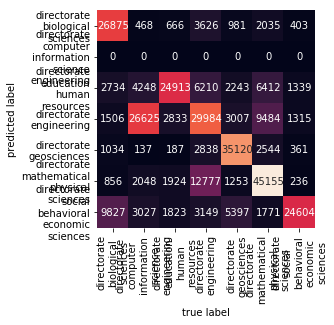

In [8]:
%matplotlib inline

# print("Homogeneity: %0.3f" % metrics.homogeneity_score(Directorate_coded, km.labels_))
# print("Completeness: %0.3f" % metrics.completeness_score(Directorate_coded, km.labels_))
# print("V-measure: %0.3f" % metrics.v_measure_score(Directorate_coded, km.labels_))
# print("Adjusted Rand-Index: %.3f"
#       % metrics.adjusted_rand_score(Directorate_coded, km.labels_))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, km.labels_, sample_size=1000))
#print()

print("How well does it match our Directorate?")
# does it match our Directorate?
pred_clusters = km.predict(X)
Pred_DirectName_coded = np.zeros_like(pred_clusters)
Clusters_names_coded = np.zeros((true_k,1), dtype =int)
for i in range(true_k):
    mask = (pred_clusters == i)
    Pred_DirectName_coded[mask] = mode(Directorate_coded[mask])[0]
    Clusters_names_coded[i] = mode(Directorate_coded[mask])[0]
# recover names of directorate
Clusters_names = Directorate_encoder.inverse_transform(Clusters_names_coded)
# print cluster number and most frequent directorate name
for i in range(true_k):
    print('Cluster {}, {}'.format(\
          i+1,*Clusters_names[i]))

# accuracy score
score = accuracy_score(Directorate_coded, pred_clusters)
print('Match score = {:.4f}'.format(score))
# confusion matrix
mat = metrics.confusion_matrix(Directorate_coded, Pred_DirectName_coded)
print(mat)
target_names_list_mod = [ '\n'.join(tn.split()) \
                         for tn in target_names_list]
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names_list_mod,
            yticklabels=target_names_list_mod)
plt.xlabel('true label')
plt.ylabel('predicted label');


print("Top terms per cluster:")
# clusters center should be an array of true_k * vocab
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
        print("Cluster %d:" % i, end='')
          # print the top 10 words for each cluster
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

In [9]:
mode(Directorate_coded[mask])

ModeResult(mode=array([5], dtype=int64), count=array([17946]))

In [17]:
bin_edges = np.linspace( 0, true_k, num=true_k+1)
for i in range(true_k):
    mask = (pred_clusters == i)
    Pred_DirectName_coded[mask] = mode(Directorate_coded[mask])[0]
    Clusters_names_coded[i] = mode(Directorate_coded[mask])[0]
    print(mode(Directorate_coded[mask]))
    print(np.histogram(Directorate_coded[mask],bins=bin_edges, range=None, weights=None, density=None)[0])

ModeResult(mode=array([4], dtype=int64), count=array([35120]))
[ 1034   137   187  2838 35120  2544   361]
ModeResult(mode=array([5], dtype=int64), count=array([27209]))
[  790   249  1772 11991  1170 27209    20]
ModeResult(mode=array([2], dtype=int64), count=array([24913]))
[ 2734  4248 24913  6210  2243  6412  1339]
ModeResult(mode=array([0], dtype=int64), count=array([26875]))
[26875   468   666  3626   981  2035   403]
ModeResult(mode=array([6], dtype=int64), count=array([24604]))
[ 9827  3027  1823  3149  5397  1771 24604]
ModeResult(mode=array([3], dtype=int64), count=array([29984]))
[ 1506 26625  2833 29984  3007  9484  1315]
ModeResult(mode=array([5], dtype=int64), count=array([17946]))
[   66  1799   152   786    83 17946   216]


In [15]:
bin_edges = np.linspace( 0, true_k, num=true_k+1)
bin_edges

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.])